In [1]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#a0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#f0cfc0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#f0cfc0;
  position: static;
}   
</style>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [3]:
from IPython.display import Image, IFrame
from IPython.core.display import HTML
from IPython.display import Latex

# Neural network

## 1. Layer

Maintenant, étant donné une entrée $(x_1,...,x_n)$, on organise plusieurs perceptrons en **couches**. 

<img src="https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png"> </img>

#### Exemple 0 : un réseau de neurones avec 2 couches : 2 neurones (perceptron linéaire avec fonction d'activation ReLu) sur la 1ère couche, 1 neurone (perceptron affine avec fonction d'activation Heaviside) sur la 2ème couche.

<img src="img/neural_layer_ex1.png"> </img>

**Exercice** : vérifier que la sortie est $1$ si l'entrée est $(4,7)$.

_Conseil_ : nous pouvons utiliser un produit matriciel : en Python, $A \times B$ est calculé avec cette commande : ```np.dot(A,B)```


In [5]:
def ReLu(y):
    if y<0:
        return 0
    else:
        return y

def H(y):
    if y<0:
        return 0
    else:
        return 1

In [6]:
X = np.array([4, 7])
W1 = np.array([[2, -1],[-3, 2]])
Y1 = np.dot(W1, X)
Y1 = [ReLu(y) for y in Y1]
W2 = np.array([4, 5])
b2 = -1
Y2 = np.dot(W2, Y1) + b2
Y2 = H(Y2)
print(Y2)

1


### Exemple 1
<img src="img/neural_layer_ex2.png"> </img>



#### 1st layer, 1st neuron :
Est actif si $-x+3y \geq 0$.

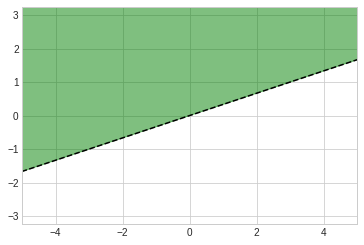

In [7]:
x=np.linspace(-6, 6, 300)
y=np.array([t / 3 for t in x])
plt.plot(x, y, 'k--')
plt.fill_between(x, y, np.max(y) + 2, color = "green", alpha = 0.5)

plt.axis('equal')
plt.axis([-5, 5, -3, 3])
plt.show()

#### 1st layer, 2nd neuron :
Is active if $2x+y \geq 0$.

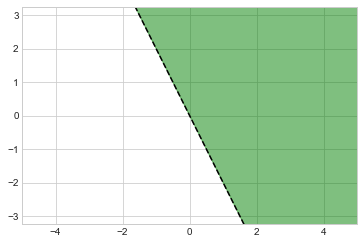

In [9]:
x = np.linspace(-6, 6, 300)
z = np.array([-2 * t for t in x])
plt.plot(x, z, 'k--')
plt.fill_between(x, z, np.max(z), color="green", alpha=0.5)

plt.axis('equal')
plt.axis([-5, 5, -3, 3])
plt.show()


#### 2ème couche, un neurone :

Ce perceptron réalise la fonction booléene ```x AND y``` (c.f. voir cours précédent).

#### Résultat des deux couches :

Le réseau de neurones a une sortie égale à $1$ à l'**intersection** des deux demi-plans où les neurones de la première couche sont égaux à $1$.


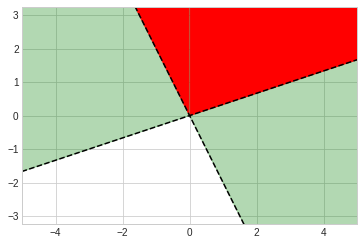

In [8]:
x = np.linspace(-6, 6, 300)
y = np.array([t / 3 for t in x])
z = np.array([-2 * t for t in x])
plt.plot(x, y, 'k--')
plt.plot(x, z, 'k--')
plt.fill_between(x, y, np.max(y) + 2, color="green", alpha=0.3)
plt.fill_between(x, z, np.max(z), color="green", alpha=0.3)
plt.fill_between(x, z, np.max(z), where=y < z, color="red", alpha=1)
plt.fill_between(x, y, np.max(z), where=y > z, color="red", alpha=1)
plt.axis('equal')
plt.axis([-5, 5, -3, 3])
plt.show()


### Exemple 2
<img src="img/neural_layer_ex3.png"> </img>



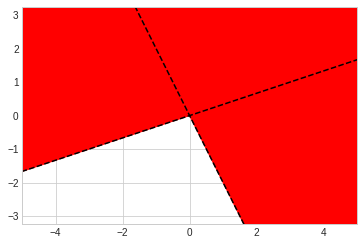

In [9]:
x = np.linspace(-6, 6, 300)
y = np.array([t / 3 for t in x])
z = np.array([-2 * t for t in x])
plt.plot(x, y, 'k--')
plt.plot(x, z, 'k--')
plt.fill_between(x, y, np.max(y) + 2, color="red", alpha=1)
plt.fill_between(x, z, np.max(z), color="red", alpha=1)
# plt.fill_between(x, z, np.max(z), where=y<z, color="red", alpha=0.5)
# plt.fill_between(x, y, np.max(z), where=y>z, color="red", alpha=0.5)
plt.axis('equal')
plt.axis([-5, 5, -3, 3])
plt.show()


Ce réseau de neurones envoie en sortie la valeur $1$ si l'entrée est dans l'__union__ des deux demi plans définis par la première couche. 

### Exercice :
Trouve un réseau de neurones donnant en sortie 1 sur la zone rouge, 0 sinon.
<img src="img/neural_layer_ex4.png"> </img>

In [10]:
def H(y):
    if y < 0:
        return 0
    else:
        return 1

def nnetwork(x, y):
    X = np.array([x, y])
    W1 = np.array([[-1, -3], [-3, 5], [-5, -1]])
    B1 = np.array([7, 7, -7])
    W2 = np.array([[1, 1, 1]])
    B2 = -3
    layer1 = np.dot(W1, X) + B1
    layer1 = np.array([H(t) for t in layer1])
    layer2 = np.dot(W2, layer1) + B2
    layer2 = H(layer2)
    output = layer2
    return output



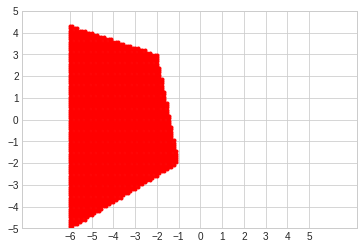

In [11]:
n = 100
xmin = -6
xmax = 5
ymin = -5
ymax = 5
X = np.linspace(xmin, xmax, n)
Y = np.linspace(ymin, ymax, n)
for x in X:
    for y in Y:
        if nnetwork(x, y) == 1:
            plt.plot(x, y, '.r')
plt.axis('equal')
plt.axis([xmin, xmax, ymin, ymax])
xtick = np.linspace(xmin, xmax, xmax - xmin + 1)
ytick = np.linspace(ymin, ymax, ymax - ymin + 1)
plt.xticks(xtick)
plt.yticks(ytick)
plt.show()


## 2. Theorie

### Comment réaliser ```XOR``` ?

#### Exercice :
Nous avons vu qu'un seul neurone n'est pas suffisant pour réaliser l'opération ```XOR```. Trouvez un réseau de neurones à deux couches qui réalise l'opération ```XOR```.


Réponse : 
<img src="img/xor_neuralnetwork.png"></img>

### Ensemble réalisables : définition et propriétés

<div class="alert alert-success" role="alert">
Un ensemble $A$ est NN-réalisable s'il existe un réseau de neurones dont la sortie donne la valeur $1$ sur $A$, $0$ sinon.
   </div>

<div class="alert alert-danger" role="alert">
Tout $n$-polygone de $\mathbb{R}^2$ est NN-réalisable avec $n+1$ neurones. 
   </div>

<div class="alert alert-danger" role="alert">
Si $A$ et $B$ sont deux ensembles NN-réalisables alors :
   <ol> 
       <li> $A \cup B$ est NN-réalisable  ;</li>
    <li> $A \cap B$ est NN-réalisable ;</li>  
    <li> $\overline{A}$ est NN-réalisable ;</li>
    <li> $A \backslash B$ est NN-réalisable.</li>
    </ol>
    </div>

<div class="alert alert-danger" role="alert">
Tout  polygone de $\mathbb{R}^2$ est NN-realizable. Ainsi, tout courbe de Jordan (simple closed curve) peut être approchée par un réseau de neurones. 
   </div>

### Universal approximation theorem 
Goal : approximate every continuous function $\mathbb{R} \to \mathbb{R}$ by a neural network. More precisely, let $f \colon [a;b] \to \mathbb{R}$ : we want to find a neural network whose output $F(x) \approx f(x)$ for all $x \in [a;b]$. To do this, assume that the output neuron has the identity $x \mapsto x$ activation function. Other neurons have Heaviside activation function.

#### Heaviside step functions

First trivial case :
<img src="img/step_function1.png"></img>

Its is easy to shift the step on the left :
<img src="img/step_function2.png"></img>

or and the right :
<img src="img/step_function3.png"></img>

step down :
<img src="img/step_function4.png"></img>
<img src="img/step_function5.png"></img>

#### Rectangular functions
Just add two Heaviside step functions !
<img src="img/rect_function.png"></img>

#### Step functions
Just add some rectangular functions ! Be careful if the rectangles ar contiguous.
<img src="img/step_function6.png"></img>

#### Continuous functions
Finally, notice that every continuous function $[a;b] \to \mathbb{R}$ can be uniformly approximated by a step function.

<img src="img/approx_function.png"></img>

### In higher dimension :

#### Exercise :
Find a neural network that performs this 2-dimensionnal function :

<img src="img/step_function7.png"></img>

#### Answer : 

<img src="img/neural_2dim_step.png"></img>

## 3. Training rule for a 1-layer network

Let $W$ be the weight matrix : each row is corresponding to a neuron of the layer. Let $b$ be the column matrix of bias : each row is corresponding to a neuron of the layer. 

Let $e$ be the column matrix of error, then the training rule is:

$$W^{new} = W^{old} + e \times x^T$$
$$b^{new} = b^{old} + e$$

## 4. How to pick an architecture

Problem specifications help define the network in the following ways:
1. Number of network inputs = number of problem inputs
2. Number of neurons in output layer = number of problem outputs
3. Output layer transfer function choice at least partly determined by
problem specification of the outputs

**Exercise**

A single-layer neural network is to have six inputs and two outputs.
The outputs are to be limited to and continuous over the
range 0 to 1. What can you tell about the network architecture?
Specifically:
* How many neurons are required?
* What are the dimensions of the weight matrix?
* What kind of transfer functions could be used?
* Is a bias required?

**Answer**: 
* Two neurons, one for each output, are required.
* The weight matrix has two rows corresponding to the two neurons and
six columns corresponding to the six inputs. (The product is a two-element
vector.)
* Of the transfer functions we have discussed, the transfer function
would be most appropriate.
* Not enough information is given to determine if a bias is required.